Hierarchical clustering

total dataset

In [3]:
import pyreadstat

HCMST_2017 = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'

df, meta = pyreadstat.read_dta(HCMST_2017)
df['Q10'].head()

0    NaN
1     13
2     11
3    NaN
4     12
Name: Q10, dtype: object

whole dataset

just a dummy with 5 features? S1,q9, q10, q12,w6_q32 

In [4]:
dummy_2017=df.loc[:,['S1','Q10','Q12','w6_q32','ppage']]
print(dummy_2017.head())

   S1  Q10  Q12 w6_q32  ppage
0   2  NaN  NaN      3     30
1   1   13    3      1     55
2   1   11    5      3     47
3   2  NaN  NaN      2     28
4   1   12    7      1     59


change to numeric not finished

In [5]:
dummy_2017 = dummy_2017.astype(str)

# dummy_2017_full=dummy_2017.replace(NaN,'unknown')

print(dummy_2017.head())

  S1  Q10  Q12 w6_q32 ppage
0  2  nan  nan      3    30
1  1   13    3      1    55
2  1   11    5      3    47
3  2  nan  nan      2    28
4  1   12    7      1    59


In [6]:
dummy_2017_full=dummy_2017.replace('nan',-2)

dummy_2017_full_copy=dummy_2017_full

print(dummy_2017_full)

     S1 Q10 Q12 w6_q32 ppage
0     2  -2  -2      3    30
1     1  13   3      1    55
2     1  11   5      3    47
3     2  -2  -2      2    28
4     1  12   7      1    59
...  ..  ..  ..    ...   ...
3505  1  12   5      8    27
3506  2  12   3      8    24
3507  1  12   5      8    41
3508  2  13   5      3    32
3509  2   9   4      3    43

[3510 rows x 5 columns]


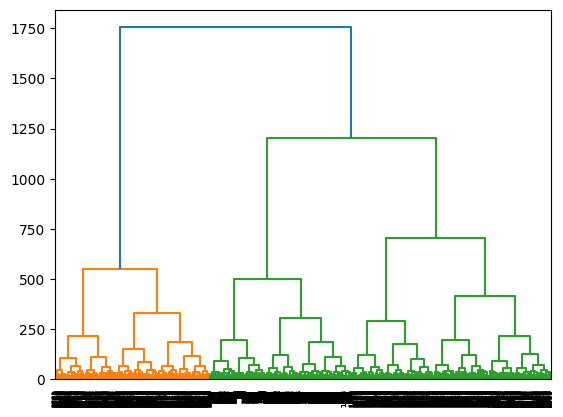

In [42]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='centroid',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

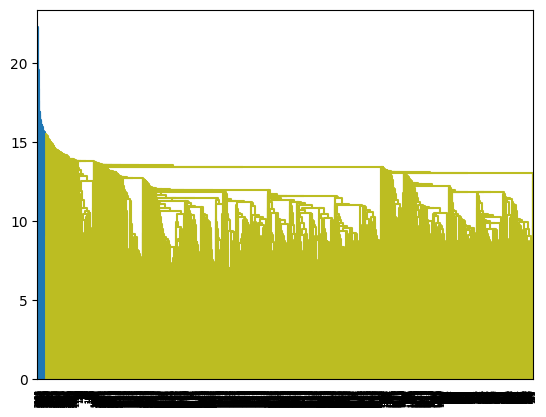

In [43]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='single',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

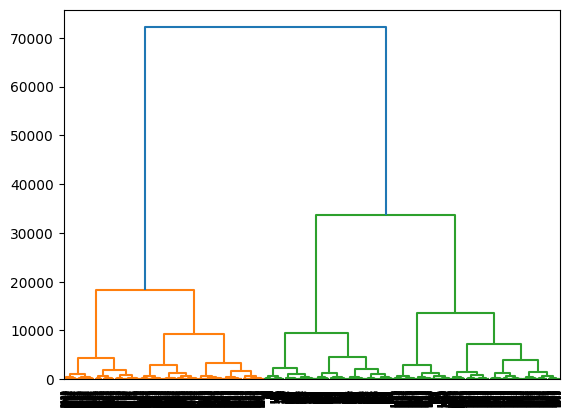

In [44]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt

Z = linkage(dummy_2017_full,
method='ward',
metric='euclidean')
dn = dendrogram(Z)
plt.show()

In [9]:
from scipy.cluster.hierarchy import fcluster

h_clusters=fcluster(Z,3,criterion='maxclust')
h_clusters

array([1, 3, 3, ..., 1, 1, 1], dtype=int32)

In [10]:
import pandas as pd

dummy_2017_full = dummy_2017_full_copy.reset_index()
clustersDf = pd.DataFrame(h_clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([dummy_2017_full, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [11]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [12]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


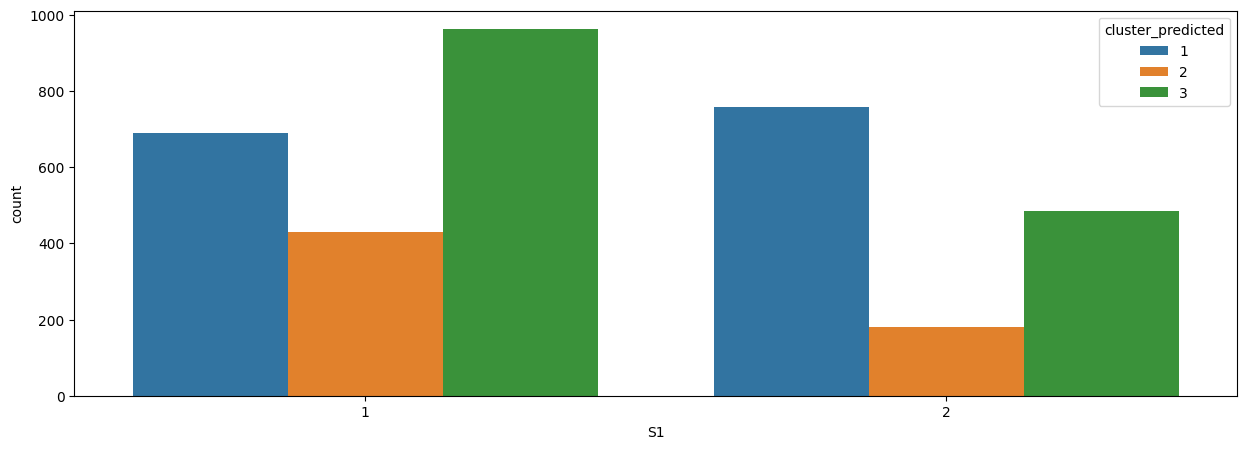

In [13]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['S1'],order=combinedDf['S1'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

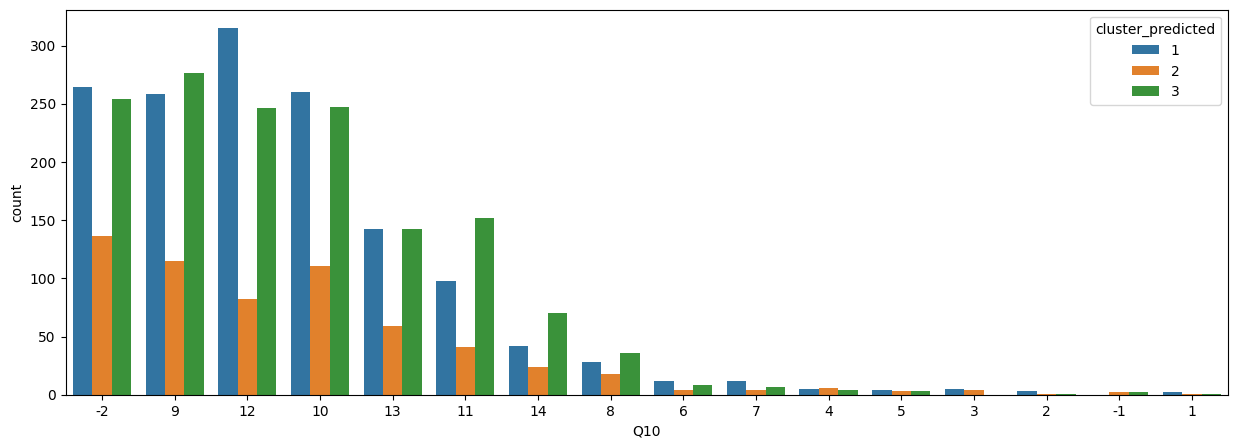

In [14]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Q10'],order=combinedDf['Q10'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

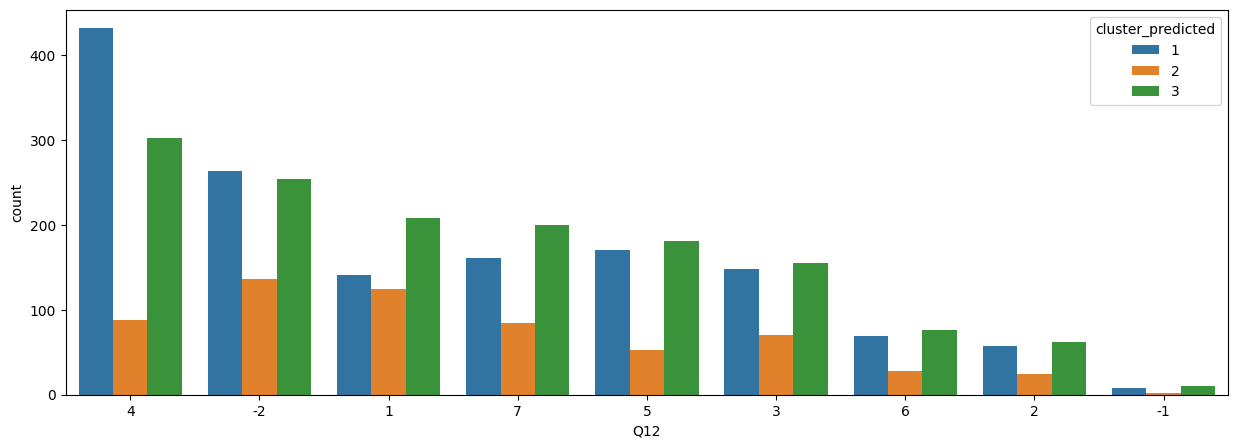

In [15]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Q12'],order=combinedDf['Q12'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

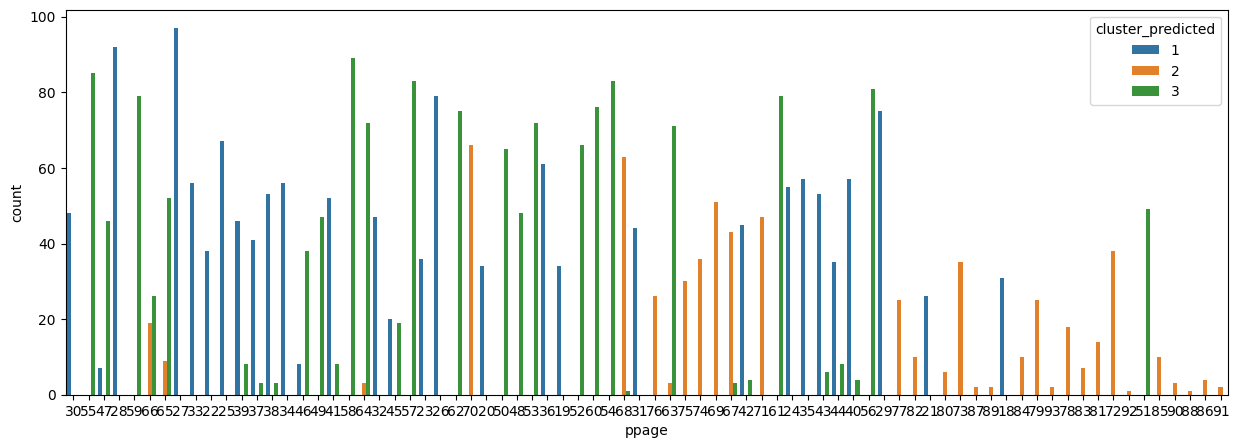

In [19]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['ppage'],order=combinedDf['ppage'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [17]:
combinedDf['ppage']

0       30
1       55
2       47
3       28
4       59
        ..
3505    27
3506    24
3507    41
3508    32
3509    43
Name: ppage, Length: 3510, dtype: object

In [39]:
import pandas as pd

combinedDf['ppage']=combinedDf['ppage'].astype(float)
for age in combinedDf['ppage']:
    combinedDf['age_bin']=combinedDf['ppage']//10


# print(combinedDf['ppage'])
print(combinedDf['age_bin'])
combinedDf.dtypes



0       3.0
1       5.0
2       4.0
3       2.0
4       5.0
       ... 
3505    2.0
3506    2.0
3507    4.0
3508    3.0
3509    4.0
Name: age_bin, Length: 3510, dtype: float64


S1                    object
Q10                   object
Q12                   object
w6_q32                object
ppage                float64
cluster_predicted     object
age_bin              float64
dtype: object

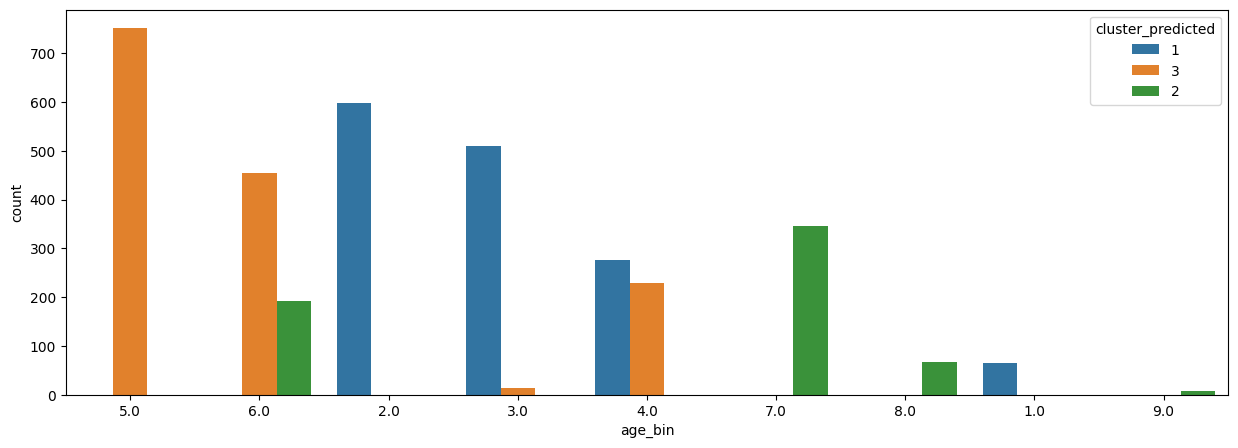

In [40]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

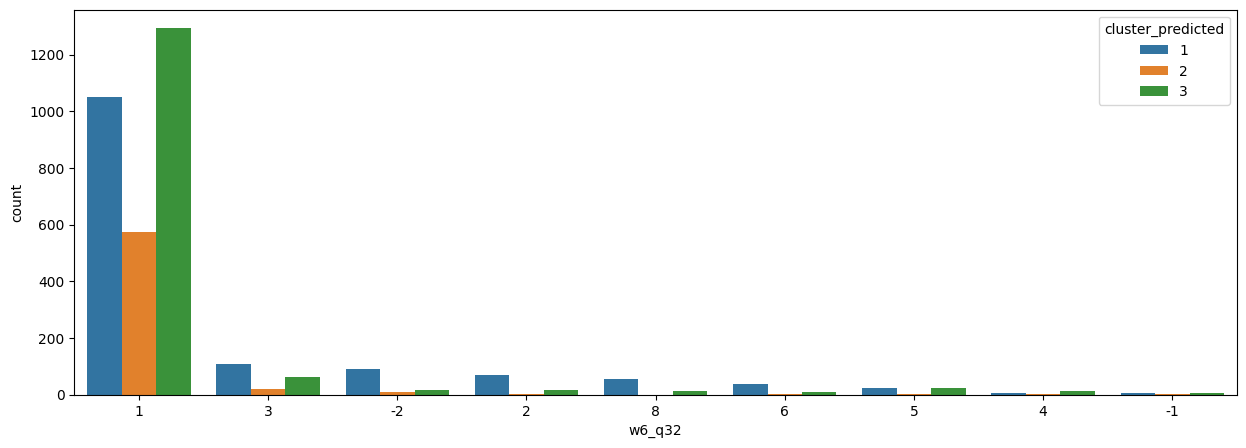

In [38]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['w6_q32'],order=combinedDf['w6_q32'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [54]:
print(combinedDf['w6_q32'])

0       Yes, an Internet dating or matchmaking site (l...
1       No, I did NOT meet [Partner Name] through the ...
2       Yes, an Internet dating or matchmaking site (l...
3       Yes, a social networking site (like Facebook o...
4       No, I did NOT meet [Partner Name] through the ...
                              ...                        
3505      Yes, an app on my phone (like Tinder or Grindr)
3506      Yes, an app on my phone (like Tinder or Grindr)
3507      Yes, an app on my phone (like Tinder or Grindr)
3508    Yes, an Internet dating or matchmaking site (l...
3509    Yes, an Internet dating or matchmaking site (l...
Name: w6_q32, Length: 3510, dtype: object


In [41]:
combinedDf['app'] = combinedDf['w6_q32'].replace([-1,1,2,3,4,5,6,8], [0,0,1,1,1,1,1,1])

print(combinedDf['app'])

0       3
1       1
2       3
3       2
4       1
       ..
3505    8
3506    8
3507    8
3508    3
3509    3
Name: app, Length: 3510, dtype: object


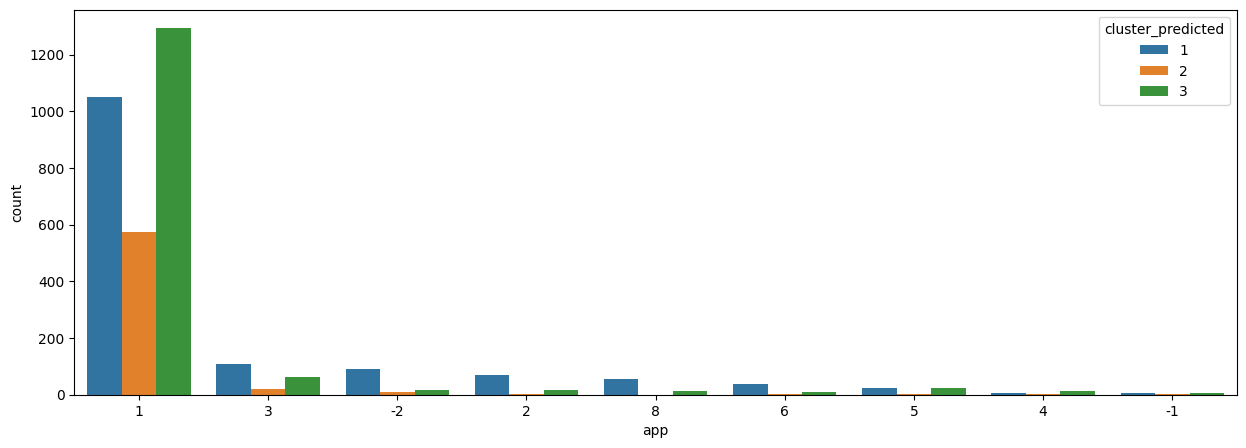

In [40]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['app'],order=combinedDf['app'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

check feature importance

In [114]:
combinedDf['Q10'] = combinedDf['Q10'].apply(lambda x: pd.factorize(x)[0])

print(combinedDf['Q10'])

0                                   [0, 0, 0, 0, 0, 0, 0]
1           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3                                   [0, 0, 0, 0, 0, 0, 0]
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
3505    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3506    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3507    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3508        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3509    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Q10, Length: 3510, dtype: object


In [42]:

X=combinedDf.loc[:,['S1','Q10','Q12','w6_q32','ppage']]


print(X['Q10'])
y=combinedDf.loc[:,'cluster_predicted']
y=y.values 
print(X.head())
print(y)

0       -2
1       13
2       11
3       -2
4       12
        ..
3505    12
3506    12
3507    12
3508    13
3509     9
Name: Q10, Length: 3510, dtype: object
  S1 Q10 Q12 w6_q32 ppage
0  2  -2  -2      3    30
1  1  13   3      1    55
2  1  11   5      3    47
3  2  -2  -2      2    28
4  1  12   7      1    59
[1 3 3 ... 1 1 1]


numeric

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf=RandomForestClassifier()

rf.fit(X_train,y_train)
print(accuracy_score(y_test, rf.predict(X_test)))


0.9971509971509972


In [44]:
print(rf.feature_importances_)

[0.01119036 0.02290583 0.01866517 0.01605924 0.9311794 ]
